## IMPORT DATA

In [ ]:
!pip install pandas
!pip install numpy
!pip install folium
!pip install matplotlib

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df= pd.read_csv('data_1.csv')

In [18]:
df.shape

(253926, 9)

In [19]:
df.head()

,TIME,REGION_ID,SPEED,REGION,HOUR,DAY_OF_WEEK,MONTH,LONGITUDE,LATITUDE
0,2018-03-09 15:40:41,1,19.09,Rogers Park - West Ridge,15,6,3,-87.682103,42.012195
1,2018-03-09 15:50:56,1,18.41,Rogers Park - West Ridge,15,6,3,-87.682103,42.012195
2,2018-03-09 16:01:45,1,19.77,Rogers Park - West Ridge,16,6,3,-87.682103,42.012195
3,2018-03-09 16:10:55,1,20.66,Rogers Park - West Ridge,16,6,3,-87.682103,42.012195
4,2018-03-09 16:21:17,1,18.82,Rogers Park - West Ridge,16,6,3,-87.682103,42.012195


In [20]:
from datetime import datetime

def change_dt(x):
    f = "%Y-%m-%d %H:%M:%S"
    dt = datetime.strptime(x, f)
    m=0
    if dt.minute < 10:
        m = 0
    elif dt.minute >= 11 and dt.minute < 20:
        m = 10
    elif dt.minute >= 20 and dt.minute < 30:
        m = 20
    elif dt.minute >= 30 and dt.minute < 40:
        m = 30
    elif dt.minute >= 40 and dt.minute < 50:
        m = 40
    else:
        m = 50
    
    return dt.replace(minute=m, second=0).strftime(f)

In [21]:
df.loc[:,'TIME'] = df["TIME"].apply(change_dt)

In [22]:
df['TIME'] = pd.to_datetime(df['TIME'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253926 entries, 0 to 253925
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   TIME         253926 non-null  datetime64[ns]
 1   REGION_ID    253926 non-null  int64         
 2   SPEED        253926 non-null  float64       
 3   REGION       253926 non-null  object        
 4   HOUR         253926 non-null  int64         
 5   DAY_OF_WEEK  253926 non-null  int64         
 6   MONTH        253926 non-null  int64         
 7   LONGITUDE    253926 non-null  float64       
 8   LATITUDE     253926 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 17.4+ MB


In [24]:
df['MINUTE']=df['TIME'].dt.minute

In [25]:
df.head()

,TIME,REGION_ID,SPEED,REGION,HOUR,DAY_OF_WEEK,MONTH,LONGITUDE,LATITUDE,MINUTE
0,2018-03-09 15:40:00,1,19.09,Rogers Park - West Ridge,15,6,3,-87.682103,42.012195,40
1,2018-03-09 15:50:00,1,18.41,Rogers Park - West Ridge,15,6,3,-87.682103,42.012195,50
2,2018-03-09 16:00:00,1,19.77,Rogers Park - West Ridge,16,6,3,-87.682103,42.012195,0
3,2018-03-09 16:50:00,1,20.66,Rogers Park - West Ridge,16,6,3,-87.682103,42.012195,50
4,2018-03-09 16:20:00,1,18.82,Rogers Park - West Ridge,16,6,3,-87.682103,42.012195,20


In [26]:
df=df.drop(columns=['REGION','LATITUDE','LONGITUDE','REGION_ID'],axis=1)

In [27]:
df.head()

,TIME,SPEED,HOUR,DAY_OF_WEEK,MONTH,MINUTE
0,2018-03-09 15:40:00,19.09,15,6,3,40
1,2018-03-09 15:50:00,18.41,15,6,3,50
2,2018-03-09 16:00:00,19.77,16,6,3,0
3,2018-03-09 16:50:00,20.66,16,6,3,50
4,2018-03-09 16:20:00,18.82,16,6,3,20


In [28]:
df['TIME']=pd.to_datetime(df['TIME'])

In [29]:
df.set_index('TIME',inplace=True)

In [30]:
df=df.resample(rule='10min').mean()

In [31]:
df.shape

(281708, 5)

In [32]:
df.reset_index(inplace=True)

In [33]:
df.isna().sum()

TIME               0
SPEED          54329
HOUR           54329
DAY_OF_WEEK    54329
MONTH          54329
MINUTE         54329
dtype: int64

In [34]:
df['MINUTE'] = df['MINUTE'].fillna(value=df['TIME'].dt.minute)
df['HOUR'] = df['HOUR'].fillna(value=df['TIME'].dt.minute)
df['DAY_OF_WEEK'] = df['DAY_OF_WEEK'].fillna(value=df['TIME'].dt.minute)
df['MONTH'] = df['MONTH'].fillna(value=df['TIME'].dt.minute)

In [35]:
df['SPEED']=df['SPEED'].bfill().ffill()

In [36]:
df.isna().sum()

TIME           0
SPEED          0
HOUR           0
DAY_OF_WEEK    0
MONTH          0
MINUTE         0
dtype: int64

<Axes: >

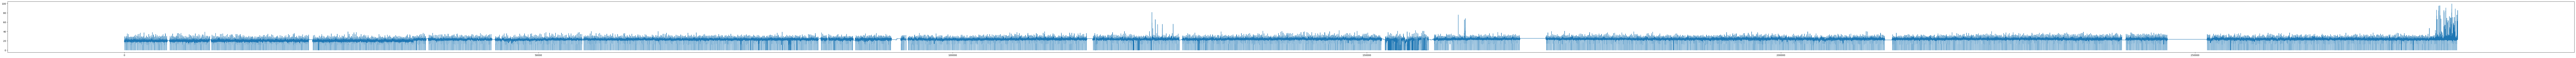

In [37]:
df['SPEED'].plot(figsize=(200,4))

In [38]:
df.set_index('TIME',inplace=True)

<Axes: xlabel='TIME'>

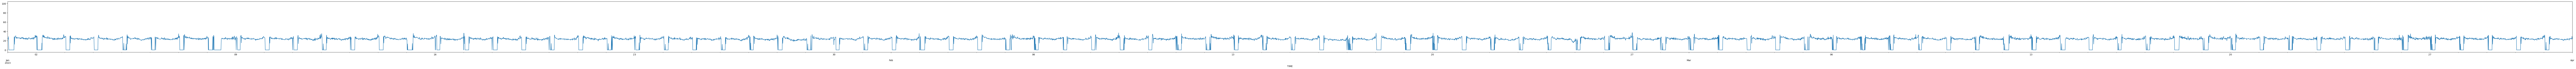

In [39]:
df['SPEED'].plot(xlim=['Jan, 2023','Apr, 2023'],figsize=(200,4))

In [ ]:
!pip install statsmodels

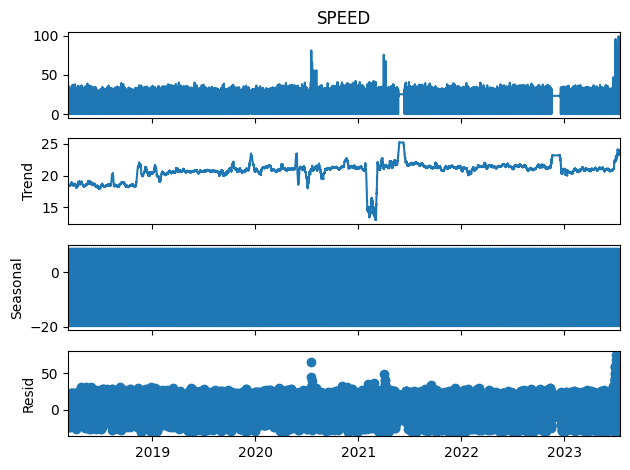

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['SPEED'],period = 1008)  
result.plot();

In [43]:
df.index.freq = '10T'
df.index

DatetimeIndex(['2018-03-09 15:40:00', '2018-03-09 15:50:00',
               '2018-03-09 16:00:00', '2018-03-09 16:10:00',
               '2018-03-09 16:20:00', '2018-03-09 16:30:00',
               '2018-03-09 16:40:00', '2018-03-09 16:50:00',
               '2018-03-09 17:00:00', '2018-03-09 17:10:00',
               ...
               '2023-07-17 21:20:00', '2023-07-17 21:30:00',
               '2023-07-17 21:40:00', '2023-07-17 21:50:00',
               '2023-07-17 22:00:00', '2023-07-17 22:10:00',
               '2023-07-17 22:20:00', '2023-07-17 22:30:00',
               '2023-07-17 22:40:00', '2023-07-17 22:50:00'],
              dtype='datetime64[ns]', name='TIME', length=281708, freq='10T')

In [44]:
df.head()

,SPEED,HOUR,DAY_OF_WEEK,MONTH,MINUTE
TIME,,,,,
2018-03-09 15:40:00,19.09,15.0,6.0,3.0,40.0
2018-03-09 15:50:00,18.41,15.0,6.0,3.0,50.0
2018-03-09 16:00:00,19.77,16.0,6.0,3.0,0.0
2018-03-09 16:10:00,18.82,10.0,10.0,10.0,10.0
2018-03-09 16:20:00,18.82,16.0,6.0,3.0,20.0


In [45]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
df['TESadd12'] = ExponentialSmoothing(df['SPEED'],trend='add',seasonal='add',seasonal_periods=1008).fit().fittedvalues
df.head()

,SPEED,HOUR,DAY_OF_WEEK,MONTH,MINUTE,TESadd12
TIME,,,,,,
2018-03-09 15:40:00,19.09,15.0,6.0,3.0,40.0,17.696870
2018-03-09 15:50:00,18.41,15.0,6.0,3.0,50.0,19.464769
2018-03-09 16:00:00,19.77,16.0,6.0,3.0,0.0,17.686438
2018-03-09 16:10:00,18.82,10.0,10.0,10.0,10.0,20.169256
2018-03-09 16:20:00,18.82,16.0,6.0,3.0,20.0,18.546721


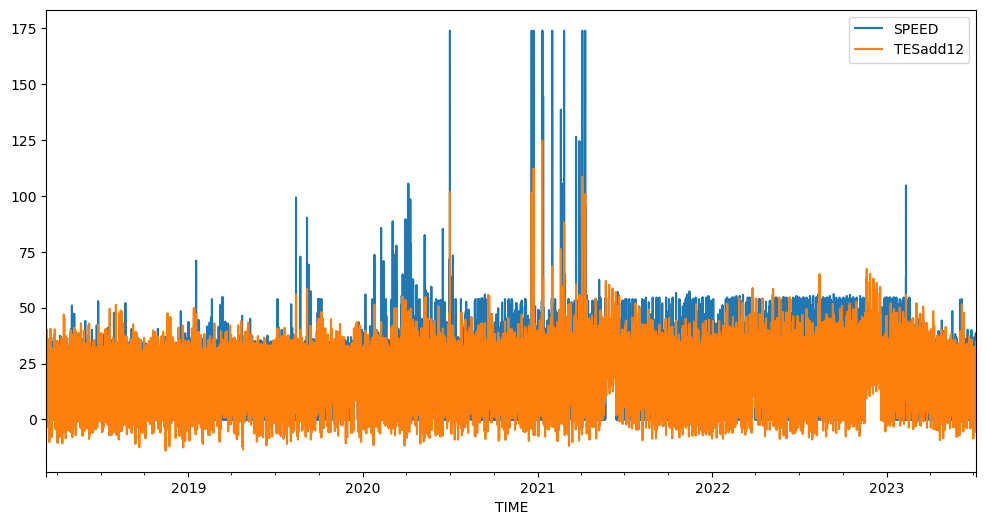

In [65]:
df[['SPEED','TESadd12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

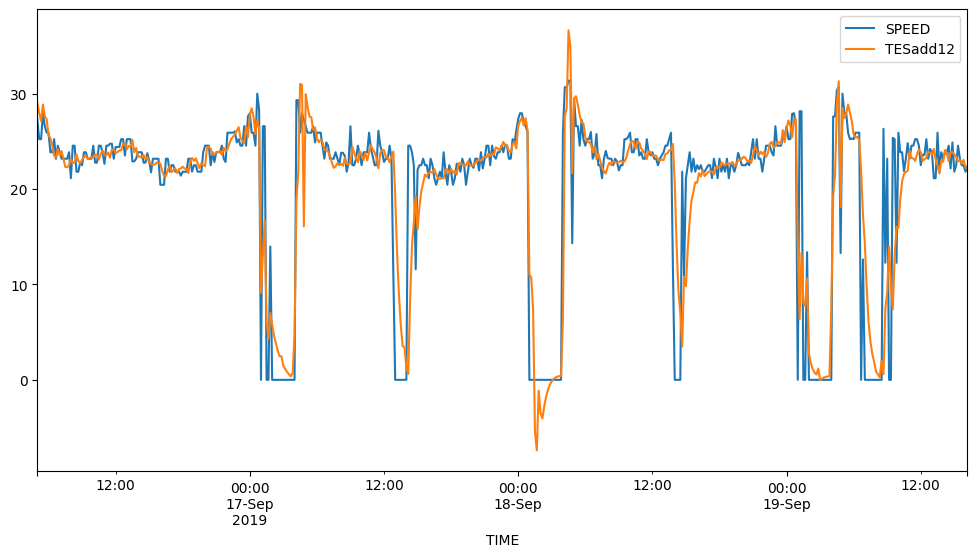

In [46]:
df[['SPEED','TESadd12']].iloc[80000:80500].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

## Fitting the Model

In [47]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fitted_model = ExponentialSmoothing(df['SPEED']['Jan,2023':'Jun, 2023'],trend='add',seasonal='add',seasonal_periods=1008).fit()

## Evaluating Model against Test Set

In [48]:
test_predictions = fitted_model.forecast(3000).rename('Forecast')

In [49]:
test_predictions

2023-07-01 00:00:00    27.391902
2023-07-01 00:10:00    28.001569
2023-07-01 00:20:00    27.825510
2023-07-01 00:30:00    28.201730
2023-07-01 00:40:00    27.084184
                         ...    
2023-07-21 19:10:00    15.260297
2023-07-21 19:20:00    14.375877
2023-07-21 19:30:00    14.870480
2023-07-21 19:40:00    14.641723
2023-07-21 19:50:00    15.657587
Freq: 10T, Name: Forecast, Length: 3000, dtype: float64

<Axes: xlabel='TIME'>

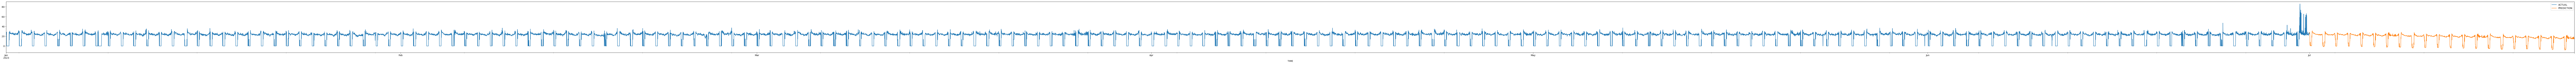

In [50]:
df['SPEED']['Jan,2023':'Jun, 2023'].plot(legend=True,label='ACTUAL')
test_predictions.plot(legend=True,label='PREDICTION',figsize=(200,4))

## FOLIUM MAPS - CURRENT DATA

In [51]:
import numpy as np
import pandas as pd
import folium

In [52]:
df=pd.read_json('https://data.cityofchicago.org/resource/t2qc-9pjd.json')

In [53]:
df

,region,_region_id,_west,_east,_south,_north,_description,current_speed,_last_updt
0,Near South-Douglas,16,-87.636322,-87.597952,41.822792,41.866129,Pershing to Roosevelt. Stewart to Lake Shore,30.89,2023-07-18 00:10:29.0
1,North Park-Albany-Linconl Sq,3,-87.747456,-87.674590,41.960669,41.997946,Montrose to Devon. Cicero to Ravenswood,27.95,2023-07-18 00:10:29.0
2,Far North West,2,-87.846210,-87.747456,41.960669,42.019100,North of Montrose. East River to Cicero,23.25,2023-07-18 00:10:29.0
3,Hermosa-Logan Square,7,-87.747456,-87.674590,41.909269,41.931841,North Ave to Diversy. Cicero to Ravenswood,24.55,2023-07-18 00:10:29.0
4,Fuller-Grand Blvd-Washington Park,20,-87.636322,-87.606334,41.764066,41.822792,71st to Pershing. Steward to Cottage Grove,25.23,2023-07-18 00:10:29.0
5,Irving Park-Avondale-North Ctr,6,-87.747456,-87.674590,41.931841,41.960669,Diversey to Montrose. Cicero to Ravenswood,25.91,2023-07-18 00:10:29.0
6,Bridgeport-McKinley-Lower West,15,-87.685372,-87.636322,41.822792,41.866129,Pershing to Roosevel. Western to Stewart,32.35,2023-07-18 00:10:29.0
7,Edge Water-Uptown,4,-87.674590,-87.646438,41.960669,41.997946,Montrose to Devon. Ravenswood to Lake Shore,25.23,2023-07-18 00:10:29.0
8,Auburn Gresham-Chatham,23,-87.672980,-87.606334,41.728472,41.764066,91st to 71st. Damen to Cottage Grove,25.91,2023-07-18 00:10:29.0
9,New City-Englewood-W Englewood,19,-87.683730,-87.636322,41.764066,41.822792,71st to Pershing. Western to Steward,29.32,2023-07-18 00:10:29.0


In [54]:
df['LONGITUDE']=(df['_east']+df['_west'])/2
df['LATITUDE']=(df['_north']+df['_south'])/2

In [55]:
df=df.drop(columns=['_west','_east','_south','_north','_description'],axis=1)

In [56]:
df

,region,_region_id,current_speed,_last_updt,LONGITUDE,LATITUDE
0,Near South-Douglas,16,30.89,2023-07-18 00:10:29.0,-87.617137,41.844460
1,North Park-Albany-Linconl Sq,3,27.95,2023-07-18 00:10:29.0,-87.711023,41.979308
2,Far North West,2,23.25,2023-07-18 00:10:29.0,-87.796833,41.989884
3,Hermosa-Logan Square,7,24.55,2023-07-18 00:10:29.0,-87.711023,41.920555
4,Fuller-Grand Blvd-Washington Park,20,25.23,2023-07-18 00:10:29.0,-87.621328,41.793429
5,Irving Park-Avondale-North Ctr,6,25.91,2023-07-18 00:10:29.0,-87.711023,41.946255
6,Bridgeport-McKinley-Lower West,15,32.35,2023-07-18 00:10:29.0,-87.660847,41.844460
7,Edge Water-Uptown,4,25.23,2023-07-18 00:10:29.0,-87.660514,41.979308
8,Auburn Gresham-Chatham,23,25.91,2023-07-18 00:10:29.0,-87.639657,41.746269
9,New City-Englewood-W Englewood,19,29.32,2023-07-18 00:10:29.0,-87.660026,41.793429


In [57]:
import ipywidgets as widgets
source=widgets.Dropdown(
    options=np.array(df['region']),
    description='Please select the source:',
)
source

Dropdown(description='Please select the source:', options=('Near South-Douglas', 'North Park-Albany-Linconl Sq…

In [58]:
destination=widgets.Dropdown(
    options=df['region'],
    description='Please select the destination:',
)
destination

Dropdown(description='Please select the destination:', options=('Near South-Douglas', 'North Park-Albany-Linco…

In [60]:
s=source.value
d=destination.value

In [61]:
dt=df.loc[(df['region']==s) | (df['region']==d)]

In [62]:
dt

,region,_region_id,current_speed,_last_updt,LONGITUDE,LATITUDE
10,Hyde Park-Kenwood-Woodlawn,21,27.95,2023-07-18 00:10:29.0,-87.586297,41.793429
18,Riverdale-Hegewisch,28,173.86,2023-07-18 00:10:29.0,-87.593472,41.660808


In [63]:
test_predictions.get(key='2023-07-16 08:20')

19.062120854918625

In [64]:
map = folium.Map(location=[41.881832, -87.623177])

for lat,lon,tip,k in zip(dt['LATITUDE'], dt['LONGITUDE'], dt['region'],dt['_region_id']):
        folium.Marker(location=[lat,lon], tooltip = tip+str(k)).add_to(map)
    
map